In [ ]:
!cp  "/content/drive/My Drive/N30W120-N40W110_FABDEM_V1-2.zip" "/content/"


In [ ]:
!unzip /content/N30W120-N40W110_FABDEM_V1-2.zip

Archive:  /content/N30W120-N40W110_FABDEM_V1-2.zip
 extracting: N30W117_FABDEM_V1-2.tif  
 extracting: N30W116_FABDEM_V1-2.tif  
 extracting: N30W115_FABDEM_V1-2.tif  
 extracting: N30W114_FABDEM_V1-2.tif  
 extracting: N30W113_FABDEM_V1-2.tif  
 extracting: N30W112_FABDEM_V1-2.tif  
 extracting: N30W111_FABDEM_V1-2.tif  
 extracting: N31W117_FABDEM_V1-2.tif  
 extracting: N31W116_FABDEM_V1-2.tif  
 extracting: N31W115_FABDEM_V1-2.tif  
 extracting: N31W114_FABDEM_V1-2.tif  
 extracting: N31W113_FABDEM_V1-2.tif  
 extracting: N31W112_FABDEM_V1-2.tif  
 extracting: N31W111_FABDEM_V1-2.tif  
 extracting: N32W119_FABDEM_V1-2.tif  
 extracting: N32W118_FABDEM_V1-2.tif  
 extracting: N32W117_FABDEM_V1-2.tif  
 extracting: N32W116_FABDEM_V1-2.tif  
 extracting: N32W115_FABDEM_V1-2.tif  
 extracting: N32W114_FABDEM_V1-2.tif  
 extracting: N32W113_FABDEM_V1-2.tif  
 extracting: N32W112_FABDEM_V1-2.tif  
 extracting: N32W111_FABDEM_V1-2.tif  
 extracting: N33W120_FABDEM_V1-2.tif  
 extracting: 

In [ ]:
!pip uninstall rasterio gdal -y

Found existing installation: GDAL 3.4.3
Uninstalling GDAL-3.4.3:
  Successfully uninstalled GDAL-3.4.3


In [ ]:
!pip install GDAL==3.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.6/757.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GDAL: filename=GDAL-3.4.3-cp310-cp310-linux_x86_64.whl size=3014841 sha256=651f4645c4c881d93b34570cb7e5a12a164e9a3fd3a47e5ccb7646e493ba05f0
  Stored in directory: /root/.cache/pip/wheels/90/e2/85/741bb14bc3e07a30ebcfa9d71d478962786532e9a61e73281b
Successfully built GDAL


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 26.1 MB/s eta 0:00:00


In [ ]:
!pip install geopy

In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import rasterio
from osgeo import gdal
print(rasterio.__version__, gdal.__version__)

1.3.9 3.4.3


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
import itertools
import geopandas as gp
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

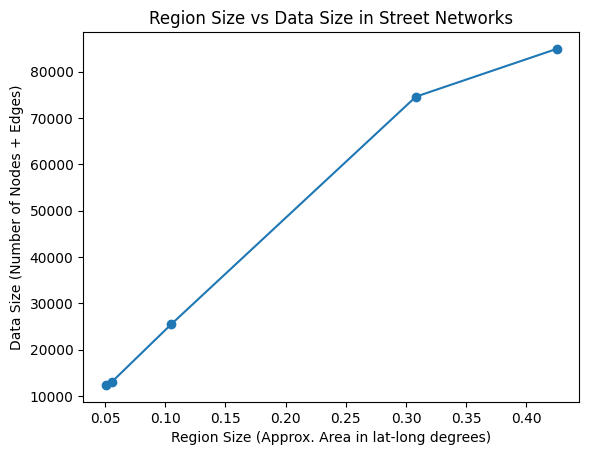

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define different regions with bounding boxes around Los Angeles
regions = [
    (34.08, 33.85, -118.30,-118.52),  # Expanded Santa Monica
    (34.25, 34.05, -118.19, -118.47),  # Expanded Hollywood
    (34.30, 34.00,  -118.15,-118.50),  # Expanded Downtown LA
    (34.16, 33.7, -117.85, -118.52),  # Larger region including much of LA
    (34.25, 33.75, -117.75, -118.60),  # Even larger region
    # Add more regions as needed
]

# Custom filter
cf = '["highway"~"primary|secondary|tertiary|trunk|motorway"]'

# Lists to store region size and data size
region_sizes = []
data_sizes = []

for north, south, east, west in regions:
    # Create graph
    G = ox.graph_from_bbox(north, south, east, west, network_type='drive', custom_filter=cf)

    # Convert to GeoDataFrame
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

    # Calculate data size (number of nodes + number of edges)
    data_size = len(gdf_nodes) + len(gdf_edges)

    # Calculate region area (approximation)
    region_area = (north - south) * (east - west)  # This is a simplistic area calculation

    # Append to lists
    region_sizes.append(region_area)
    data_sizes.append(data_size)

# Plotting
plt.plot(region_sizes, data_sizes, marker='o')
plt.xlabel('Region Size (Approx. Area in lat-long degrees)')
plt.ylabel('Data Size (Number of Nodes + Edges)')
plt.title('Region Size vs Data Size in Street Networks')
plt.show()


In [ ]:
cf = '["highway"~"primary|secondary|tertiary|trunk|motorway"]'
Graph = ox.graph_from_bbox(33.86, 33.73, -118.17, -118.30, network_type='drive', custom_filter=cf)

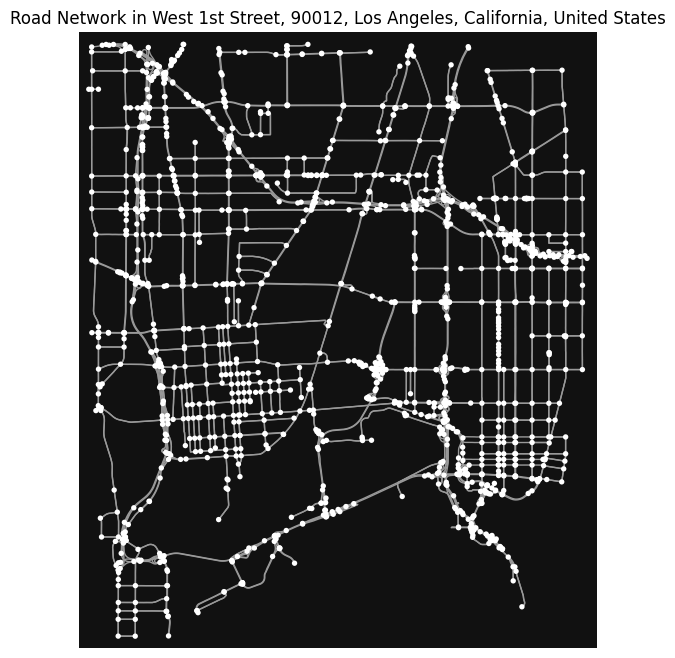

In [ ]:
from geopy.geocoders import Photon
import matplotlib.pyplot as plt

geolocator = Photon(user_agent="measurements")

location_point = (34.052235, -118.243683)
location = geolocator.reverse(location_point, exactly_one=True)
location_name = location.address if location else "Unknown Location"

fig, ax = ox.plot_graph(Graph, show=False, close=False)

ax.set_title(f"Road Network in {location_name}")

plt.show()

In [ ]:
raster_path = ["/content/Copernicus_DSM_10_N33_00_W117_00_DEM.tif","/content/Copernicus_DSM_10_N33_00_W118_00_DEM.tif","/content/Copernicus_DSM_10_N34_00_W117_00_DEM.tif","/content/Copernicus_DSM_10_N34_00_W118_00_DEM.tif"]
cf = '["highway"~"primary|secondary|tertiary|trunk|motorway"]'
G = ox.graph_from_bbox(33.86, 33.73, -118.17, -118.30, network_type='drive', custom_filter=cf)
G= ox.elevation.add_node_elevations_raster(G, raster_path)
G = ox.elevation.add_edge_grades(G, add_absolute=True)

In [ ]:
dsm_gdf_nodes, dsm_gdf_edges = ox.graph_to_gdfs(G)

In [ ]:
dsm_gdf_nodes

,y,x,highway,street_count,elevation,ref,geometry
osmid,,,,,,,
20399934,33.846729,-118.193853,traffic_signals,5,0.0,NaN,POINT (-118.19385 33.84673)
20399938,33.789861,-118.189483,traffic_signals,4,0.0,NaN,POINT (-118.18948 33.78986)
20955698,33.831236,-118.208676,NaN,3,0.0,NaN,POINT (-118.20868 33.83124)
21098502,33.841969,-118.299238,traffic_signals,4,0.0,NaN,POINT (-118.29924 33.84197)
26201028,33.786368,-118.281380,NaN,3,0.0,NaN,POINT (-118.28138 33.78637)
...,...,...,...,...,...,...,...
10956846076,33.759919,-118.242156,NaN,1,0.0,NaN,POINT (-118.24216 33.75992)
10960395829,33.786693,-118.242592,NaN,3,0.0,NaN,POINT (-118.24259 33.78669)
11230579112,33.770061,-118.208128,NaN,3,0.0,NaN,POINT (-118.20813 33.77006)


In [ ]:
dsm_gdf_edges

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True     NaN                    NaN   
11230579115 4604123132  0     False     NaN          Pier D Street   
            1837218896  0     False     NaN          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

In [ ]:
new_raster_path=['/content/N33W117_FABDEM_V1-2.tif','/content/N34W117_FABDEM_V1-2.tif',"/content/N34W118_FABDEM_V1-2.tif","/content/N33W118_FABDEM_V1-2.tif"]
cf = '["highway"~"primary|secondary|tertiary|trunk|motorway"]'
G_DEM = ox.graph_from_bbox(33.86, 33.73, -118.17, -118.30, network_type='drive', custom_filter=cf)
G_DEM = ox.elevation.add_node_elevations_raster(G_DEM, new_raster_path)
G_DEM = ox.elevation.add_edge_grades(G_DEM, add_absolute=True)

In [ ]:
dem_gdf_nodes, dem_gdf_edges = ox.graph_to_gdfs(G_DEM)

In [ ]:
dem_gdf_nodes

,y,x,highway,street_count,elevation,ref,geometry
osmid,,,,,,,
20399934,33.846729,-118.193853,traffic_signals,5,NaN,NaN,POINT (-118.19385 33.84673)
20399938,33.789861,-118.189483,traffic_signals,4,NaN,NaN,POINT (-118.18948 33.78986)
20955698,33.831236,-118.208676,NaN,3,NaN,NaN,POINT (-118.20868 33.83124)
21098502,33.841969,-118.299238,traffic_signals,4,NaN,NaN,POINT (-118.29924 33.84197)
26201028,33.786368,-118.281380,NaN,3,NaN,NaN,POINT (-118.28138 33.78637)
...,...,...,...,...,...,...,...
10956846076,33.759919,-118.242156,NaN,1,NaN,NaN,POINT (-118.24216 33.75992)
10960395829,33.786693,-118.242592,NaN,3,NaN,NaN,POINT (-118.24259 33.78669)
11230579112,33.770061,-118.208128,NaN,3,NaN,NaN,POINT (-118.20813 33.77006)


In [ ]:
dem_gdf_edges

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True     NaN                    NaN   
11230579115 4604123132  0     False     NaN          Pier D Street   
            1837218896  0     False     NaN          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

In [ ]:
_dem_gdf_edges = dem_gdf_edges.copy()
del _dem_gdf_edges['geometry']
_dem_gdf_edges = _dem_gdf_edges.add_suffix('_dem')

In [ ]:
_dem_gdf_edges

osmid_dem  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway_dem lanes_dem               name_dem  \
u           v           key                                                
20399934    1932462185  0          True    [3, 4]      Del Amo Boulevard   
            287716000   0         False    [9, 6]      Del Amo Boulevard   
            287716028   0         False    [6, 5]   Long Beach Boulevard   
            4011268748  0         False         6   Long Beach Boulevard   
20399938    122647550   0         False    [6, 7]  Pacific Coast Highway   
...                                 ...       ...                    ...   
11230579112 11230579115 0          True       NaN                    NaN   
11230579115 4604123132  0         False       NaN          Pier D Street   
            1837218896  0         False       NaN          Pier D Street   
11240451840 123575725   0         False    [6, 7]  Pacific Coast Highway   
            289192501   0         False    [6, 7]  Pacific Coast Highway   

                               highway_dem maxspeed_dem reversed_dem  \
u           v           key                                            
20399934    1932462185  0          primary       40 mph        False   
            287716000   0          primary       40 mph         True   
            287716028   0          primary       30 mph         True   
            4011268748  0          primary       30 mph        False   
20399938    122647550   0          primary       35 mph        False   
...                                    ...          ...          ...   
11230579112 11230579115 0    tertiary_link          NaN        False   
11230579115 4604123132  0         tertiary       35 mph        False   
            1837218896  0         tertiary       35 mph         True   
11240451840 123575725   0          primary       35 mph        False   
            289192501   0          primary       35 mph         True   

                             length_dem bridge_dem  grade_dem  grade_abs_dem  \
u           v           key                                                    
20399934    1932462185  0       975.446        yes        NaN            NaN   
            287716000   0       

In [ ]:
concat_gdf_edges = pd.concat([dsm_gdf_edges,_dem_gdf_edges],axis=1)

In [ ]:
concat_gdf_edges

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True     NaN                    NaN   
11230579115 4604123132  0     False     NaN          Pier D Street   
            1837218896  0     False     NaN          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

In [ ]:
higher_grade_edges = concat_gdf_edges[concat_gdf_edges["grade_abs"]>concat_gdf_edges["grade_abs_dem"]]

In [ ]:
modify_nodes = {}
modify_nodes_stat = {}

In [ ]:
def push_modify_nodes(node_id, node_elevation):
    if modify_nodes.__contains__(node_id):  # Check if the node ID exists in the dictionary
        modify_nodes[node_id].append(node_elevation)  # If it exists, append the elevation value to the list
    else:
        modify_nodes[node_id] = [node_elevation]  # If it doesn't exist, create a new entry with a list containing the elevation value


In [ ]:
def modify_node(u_node_id, v_node_id, length, target_grades):
    # Calculate elevation differences for the nodes in the main graph and DEM graph
    u_diff = G.nodes[u_node_id]["elevation"] - G_DEM.nodes[u_node_id]["elevation"]
    v_diff = G.nodes[v_node_id]["elevation"] - G_DEM.nodes[v_node_id]["elevation"]

    if u_diff > 0 and v_diff > 0:
        # Both nodes have higher elevation in the main graph than in the DEM graph
        if u_diff < v_diff:
            # If u_diff is smaller, modify v_node_id's elevation
            push_modify_nodes(v_node_id, G.nodes[u_node_id]["elevation"] + length * target_grades)
        else:
            # Otherwise, modify u_node_id's elevation
            push_modify_nodes(u_node_id, G.nodes[v_node_id]["elevation"] + length * target_grades)
    elif u_diff < 0 and v_diff < 0:
        # Both nodes have lower elevation in the main graph than in the DEM graph
        # Set both nodes' elevations to the DEM values
        push_modify_nodes(v_node_id, G_DEM.nodes[v_node_id]["elevation"])
        push_modify_nodes(u_node_id, G_DEM.nodes[u_node_id]["elevation"])
    else:
        # One node has higher elevation and the other has lower elevation
        if u_diff > 0:
            # u_node_id has higher elevation in the main graph
            push_modify_nodes(v_node_id, G.nodes[u_node_id]["elevation"] + length * target_grades)
        else:
            # v_node_id has higher elevation in the main graph
            push_modify_nodes(u_node_id, G.nodes[v_node_id]["elevation"] + length * target_grades)


In [ ]:
for index, row in higher_grade_edges.iterrows():
    # Iterate over the rows of the GeoDataFrame 'higher_grade_edges'

    if "link" not in row["highway"]:
        # Check if the 'highway' column of the current row does not contain the string "link"

        # Call the 'modify_node' function with the following arguments:
        # - 'index[0]' and 'index[1]' are the node IDs for the edge
        # - 'row["length"]' is the length of the edge
        # - 'row["grade_abs_dem"]' is the absolute grade from the DEM for the edge
        modify_node(index[0], index[1], row["length"], row["grade_abs_dem"])


In [ ]:
import numpy as np

# Iterate over the keys (node IDs) and values (lists of elevation values) in modify_nodes
for key, value in modify_nodes.items():
    # Calculate statistics for the elevation values using numpy functions
    mean_value = np.mean(value)        # Calculate the mean
    std_value = np.std(value)          # Calculate the standard deviation
    max_value = np.max(value)          # Calculate the maximum
    min_value = np.min(value)          # Calculate the minimum
    median_value = np.median(value)    # Calculate the median

    # Store the calculated statistics in modify_nodes_stat with the node ID as the key
    modify_nodes_stat[key] = {
        "mean": mean_value,
        "std": std_value,
        "max": max_value,
        "min": min_value,
        "median": median_value
    }


In [ ]:
def get_min_mean_group_var(arr):
    # Generate all possible combinations of elements from arr
    combinations = []
    for i in range(2, len(arr) + 1):
        iter = itertools.combinations(arr, i)
        combinations.append(list(iter))

    # Calculate the standard deviation of the original arr
    std = np.std(arr)

    # Initialize min_group with the original arr
    min_group = arr

    # Iterate over all combinations to find the one with the minimum standard deviation
    for item in combinations:
        item_std = np.std(item)
        if item_std <= std:
            std = item_std
            min_group = item

    # Calculate statistics (mean, std, max, min) for the minimum standard deviation group
    result = {
        "mean": np.mean(min_group),
        "std": std,
        "max": np.max(min_group),
        "min": np.min(min_group),
        "mean_group": list(min_group)
    }

    return result


In [ ]:
for key, value in modify_nodes.items():
    # Iterate over the keys (node IDs) and values (lists of elevation values) in modify_nodes

    # Call the 'get_min_mean_group_var' function with the elevation values as input
    # Extract the 'mean' value from the result dictionary and print it
    mean_elevation = get_min_mean_group_var(value)["mean"]

    # You can print or use the 'mean_elevation' as needed
    print(f"Node {key}: Mean Elevation = {mean_elevation}")


In [ ]:
for node in G.nodes:
    # Iterate through all nodes in the graph G

    # Set the "istunnel" attribute to False for the current node
    G.nodes[node]["istunnel"] = False

    # Set the "isbridge" attribute to False for the current node
    G.nodes[node]["isbridge"] = False


In [ ]:
for key, value in modify_nodes.items():
    # Iterate over the keys (node IDs) and values (lists of elevation values) in modify_nodes

    # Calculate the mean elevation using the 'get_min_mean_group_var' function
    mean_elevation = get_min_mean_group_var(value)["mean"]

    # Create a dictionary of attributes for the current node, including the mean elevation
    attrs = {key: {"elevation": mean_elevation}}

    # Set the node attributes for the graph G
    nx.set_node_attributes(G, attrs)


In [ ]:
tunnel_height = 4.5  # Assuming a tunnel height of 4.5 units (e.g., meters)

for edge in G.edges:
    # Iterate over the edges of the graph G

    u = edge[0]  # Node u
    v = edge[1]  # Node v

    # Check if the edge contains information about a tunnel
    if "tunnel" in G.edges[u, v, edge[2]]:
        # Check if the "tunnel" attribute is set to "yes" for the edge
        if G.edges[u, v, edge[2]]["tunnel"] == "yes" and not G.nodes[u]["istunnel"] and not G.nodes[v]["istunnel"]:
            # If the edge represents a tunnel ("tunnel" == "yes") and neither node is marked as a tunnel node

            # Mark both nodes as part of the tunnel
            G.nodes[u]["istunnel"] = True
            G.nodes[v]["istunnel"] = True

            # Adjust the elevations of both nodes to account for the tunnel height
            G.nodes[u]["elevation"] -= tunnel_height
            G.nodes[v]["elevation"] -= tunnel_height


In [ ]:
for edge in G.edges:
    # Iterate over the edges of the graph G

    u = edge[0]  # Node u
    v = edge[1]  # Node v

    # Create a dictionary of attributes for the current edge
    # The attributes include "ele_u" and "ele_v" with node elevations
    attrs = {edge: {"ele_u": G.nodes[u]["elevation"], "ele_v": G.nodes[v]["elevation"]}}

    # Set the edge attributes for the graph G
    nx.set_edge_attributes(G, attrs)


In [ ]:
G = ox.elevation.add_edge_grades(G, add_absolute=True)

In [ ]:
for edge in G.edges:
    # Iterate over the edges of the graph G

    u = edge[0]  # Node u
    v = edge[1]  # Node v

    if G.edges[edge]["grade_abs"] > 0.07:
        # Check if the absolute edge grade is greater than 0.07

        u_ele = G.nodes[u]["elevation"]  # Elevation of node u
        v_ele = G.nodes[v]["elevation"]  # Elevation of node v

        if u_ele > v_ele:
            # If the elevation of node u is greater than that of node v

            # Update the elevation of node u to match the elevation of node v
            G.nodes[u]["elevation"] = G.nodes[v]["elevation"]

            # Update the edge attribute "ele_u" with the new elevation of node u
            G.edges[edge]["ele_u"] = G.nodes[u]["elevation"]
        else:
            # If the elevation of node v is greater than or equal to that of node u

            # Update the elevation of node v to match the elevation of node u
            G.nodes[v]["elevation"] = G.nodes[u]["elevation"]

            # Update the edge attribute "ele_v" with the new elevation of node v
            G.edges[edge]["ele_v"] = G.nodes[v]["elevation"]


In [ ]:
for edge in G.edges:
    # Iterate over the edges of the graph G

    u = edge[0]  # Node u
    v = edge[1]  # Node v

    # Create a dictionary of attributes for the current edge
    # The attributes include "ele_u" and "ele_v" with node elevations
    attrs = {edge: {"ele_u": G.nodes[u]["elevation"], "ele_v": G.nodes[v]["elevation"]}}

    # Set the edge attributes for the graph G
    nx.set_edge_attributes(G, attrs)


In [ ]:
G = ox.elevation.add_edge_grades(G, add_absolute=True)

In [ ]:
modfy_nodes_gdf, modfy_edges_gdf = ox.graph_to_gdfs(G)

In [ ]:
modfy_nodes_gdf

,y,x,highway,street_count,elevation,istunnel,isbridge,ref,geometry
osmid,,,,,,,,,
20399934,33.846729,-118.193853,traffic_signals,5,0.0,False,False,NaN,POINT (-118.19385 33.84673)
20399938,33.789861,-118.189483,traffic_signals,4,0.0,False,False,NaN,POINT (-118.18948 33.78986)
20955698,33.831236,-118.208676,NaN,3,0.0,False,False,NaN,POINT (-118.20868 33.83124)
21098502,33.841969,-118.299238,traffic_signals,4,0.0,False,False,NaN,POINT (-118.29924 33.84197)
26201028,33.786368,-118.281380,NaN,3,0.0,False,False,NaN,POINT (-118.28138 33.78637)
...,...,...,...,...,...,...,...,...,...
10956846076,33.759919,-118.242156,NaN,1,0.0,False,False,NaN,POINT (-118.24216 33.75992)
10960395829,33.786693,-118.242592,NaN,3,0.0,False,False,NaN,POINT (-118.24259 33.78669)
11230579112,33.770061,-118.208128,NaN,3,0.0,False,False,NaN,POINT (-118.20813 33.77006)


In [ ]:
modfy_edges_gdf

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True     NaN                    NaN   
11230579115 4604123132  0     False     NaN          Pier D Street   
            1837218896  0     False     NaN          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

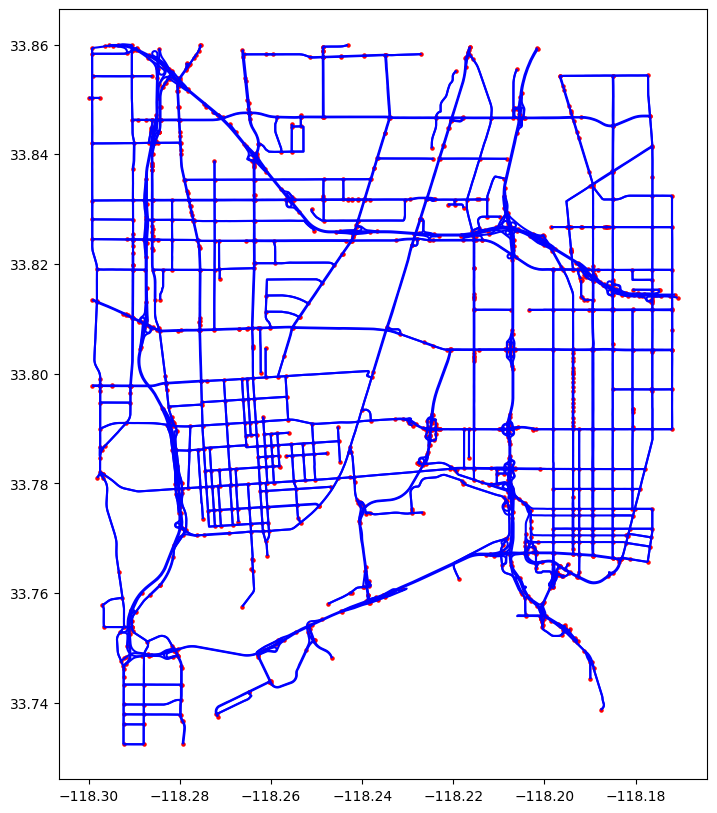

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt


# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  # Create a plot with custom size
modfy_edges_gdf.plot(ax=ax, edgecolor='blue')  # Plot edges
modfy_nodes_gdf.plot(ax=ax, color='red', markersize=5)  # Plot nodes

# Display the plot
plt.show()

In [ ]:
import geopandas as gpd

# Check if the geometry type includes Z (for 3D data)
print(modfy_edges_gdf.geometry.geom_type.unique())

print('elevation' in modfy_edges_gdf.columns)


['LineString']
False


In [ ]:
import geopandas as gpd

# Check if the geometry type includes Z (for 3D data)
print(modfy_nodes_gdf.geometry.geom_type.unique())

print('elevation' in modfy_nodes_gdf.columns)


['Point']
True


In [ ]:
modfy_nodes_gdf['elevation'].fillna(0, inplace=True)

In [ ]:
modfy_edges_gdf['ele_v'].fillna(0, inplace=True)

In [ ]:
modfy_edges_gdf['ele_u'].fillna(0, inplace=True)

In [ ]:
modfy_edges_gdf['lanes'].fillna(0,inplace=True)

In [ ]:
def replace_tuple(value):
    if isinstance(value, tuple) and value == ('1q', '1'):
        return 1
    else:
        return value

# Apply the function to the 'lanes' column
modfy_edges_gdf['lanes'] = modfy_edges_gdf['lanes'].apply(replace_tuple)

In [ ]:
modfy_edges_gdf.dtypes

osmid          object
oneway           bool
lanes          object
name           object
highway        object
maxspeed       object
reversed       object
length        float64
bridge         object
geometry     geometry
grade         float64
grade_abs     float64
ele_u         float64
ele_v         float64
ref            object
access         object
tunnel         object
junction       object
dtype: object

In [ ]:
modfy_edges_gdf

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True       0                    NaN   
11230579115 4604123132  0     False       0          Pier D Street   
            1837218896  0     False       0          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

In [ ]:
gdf2 = modfy_edges_gdf.copy()

In [ ]:
gdf2

osmid  \
u           v           key                                                                                                                         
20399934    1932462185  0    [398361924, 55886697, 398361930, 55886699, 55886700, 26267179, 26267178, 398361904, 398361911, 145075800, 398361913]   
            287716000   0                                                                                                  [145075795, 398361901]   
            287716028   0                                                                                                  [398363314, 398363318]   
            4011268748  0                                                                                                               398363316   
20399938    122647550   0                                                                  [379743019, 56060558, 397985427, 397985332, 400026207]   
...                                                                                                                                           ...   
11230579112 11230579115 0                                                                                                              1212181037   
11230579115 4604123132  0                                                                                                                13346236   
            1837218896  0                                                                                                                13346236   
11240451840 123575725   0                      [397985346, 397985189, 64092198, 397985414, 397985266, 397985300, 379753783, 397985434, 397985181]   
            289192501   0                                                                                       [397985181, 397985326, 397985351]   

                             oneway   lanes                   name  \
u           v           key                                          
20399934    1932462185  0      True  [3, 4]      Del Amo Boulevard   
            287716000   0     False  [9, 6]      Del Amo Boulevard   
            287716028   0     False  [6, 5]   Long Beach Boulevard   
            4011268748  0     False       6   Long Beach Boulevard   
20399938    122647550   0     False  [6, 7]  Pacific Coast Highway   
...                             ...     ...                    ...   
11230579112 11230579115 0      True       0                    NaN   
11230579115 4604123132  0     False       0          Pier D Street   
            1837218896  0     False       0          Pier D Street   
11240451840 123575725   0     False  [6, 7]  Pacific Coast Highway   
            289192501   0     False  [6, 7]  Pacific Coast Highway   

                                   highway maxspeed reversed    length bridge  \
u           v           key                                                     
20399934    1932462185  0          primary   40 mph    False   975.446    yes   
            287716000   0          primary   40 mph     True   166.048    NaN   
            287716028   0          primary   30 mph     True    78.474    NaN   
            4011268748  0          primary   30 mph    False    80.598    NaN   
20399938    122647550   0          primary   35 mph    False   268.307    NaN   
...                                    ...      ...      ...       ...    ...   
11230579112 11230579115 0    tertiary_link      NaN    False    59.441    NaN   
11230579115 4604123132  0         tertiary   35 mph    False  1496.564    NaN   
            1837218896  0         tertiary   35 mph     True    34.470    NaN   
11240451840 123575725   0          primary   35 mph    False   350.165    NaN   
            289192501   0          primary   35 mph     True    50.861    NaN   

                                                                                                                                                                                                                                             

In [ ]:
!apt-get install -y gdal-bin
!apt-get install -y python-gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gdal-bin is already the newest version (3.4.3+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate


In [ ]:
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString
import numpy as np

def interpolate_elevation(coords, ele_start, ele_end):
    if len(coords) < 2:
        return [ele_start] * len(coords)
    return np.linspace(ele_start, ele_end, len(coords))

def safe_convert_to_min_lane(value, default=1):
    try:
        # Check if the value is a list
        if isinstance(value, list):
            # Convert all elements to int and take the minimum
            min_lane = min(int(v) for v in value)
        else:
            # Convert a single value to int
            min_lane = int(value)

        # Return min_lane if it's greater than 0, otherwise return default
        return min_lane if min_lane > 0 else default
    except (ValueError, TypeError):
        # Return default in case of an error
        return default

def create_offset_lines_with_elevation(original_line, lane_count, offset_distance=0.00004):
    original_coords = list(original_line.coords)
    lines = [LineString([(x, y, z) for x, y, z in original_coords])]  # Start with the original 3D line

    for i in range(1, lane_count):
        direction = 1 if i % 2 == 0 else -1
        offset = i // 2 * offset_distance * direction
        # Create 2D offset line
        offset_line_2d = original_line.parallel_offset(offset, 'right')

        if not offset_line_2d.is_empty:
            # Reapply elevations to the offset line to create a 3D version
            offset_coords_2d = list(offset_line_2d.coords)
            elevations = interpolate_elevation(offset_coords_2d, original_coords[0][2], original_coords[-1][2])
            offset_line_3d = LineString([(x, y, z) for ((x, y), z) in zip(offset_coords_2d, elevations)])
            lines.append(offset_line_3d)

    return MultiLineString(lines) if len(lines) > 1 else lines[0]

# Create a new GeoDataFrame
new_gdf = gdf2.copy()

# Add column for 3D MultiLineStrings
new_gdf['multi_line_3d'] = None

for index, row in new_gdf.iterrows():
    coords_2d = list(row['geometry'].coords)
    ele_start, ele_end = row['ele_u'], row['ele_v']

    # Interpolate elevations
    elevations = interpolate_elevation(coords_2d, ele_start, ele_end)
    coords_3d = [(x, y, z) for ((x, y), z) in zip(coords_2d, elevations)]
    line_3d = LineString(coords_3d)

    # Get the lane count and create offset lines
    lane_count = safe_convert_to_min_lane(row['lanes'])
    multi_line_3d = create_offset_lines_with_elevation(line_3d, lane_count)

    # Assign the 3D MultiLineString or LineString to the new DataFrame
    new_gdf.at[index, 'multi_line_3d'] = multi_line_3d

# Now new_gdf contains the original data plus 'multi_line_3d' column


In [ ]:
new_gdf.dtypes

osmid              object
oneway               bool
lanes              object
name               object
highway            object
maxspeed           object
reversed           object
length            float64
bridge             object
geometry         geometry
grade             float64
grade_abs         float64
ele_u             float64
ele_v             float64
ref                object
access             object
tunnel             object
junction           object
multi_line_3d      object
dtype: object

In [ ]:
import pandas as pd
import re
from shapely.geometry import LineString, MultiLineString
from shapely.wkt import loads

# Create a DataFrame

# Function to extract coordinates from the 'multi_line_3d' column
def extract_coordinates_from_shapely(row):
    geometry = row['multi_line_3d']

    if isinstance(geometry, LineString):
        # Extract coordinates from LineString, including z-values
        return [(x, y, z) for x, y, z in geometry.coords]
    elif isinstance(geometry, MultiLineString):
        # Extract coordinates from each LineString in the MultiLineString, including z-values
        return [[(x, y, z) for x, y, z in line.coords] for line in geometry.geoms]
    else:
        return None

# Apply the function to extract coordinates
new_gdf['coordinates'] = new_gdf.apply(extract_coordinates_from_shapely, axis=1)




In [ ]:
new_gdf['coordinates']

u            v            key
20399934     1932462185   0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
from shapely.wkt import loads

# Assuming 'new_gdf' is your GeoDataFrame and 'line_string_column' is the name of your column with LINESTRING text
new_gdf = new_gdf.drop(columns='geometry')

# Set this new column as the active geometry column
new_gdf = new_gdf.set_geometry('multi_line_3d')

# Now, your GeoDataFrame is ready for geometric operations and export


In [ ]:
new_gdf.dtypes

osmid              object
oneway               bool
lanes              object
name               object
highway            object
maxspeed           object
reversed           object
length            float64
bridge             object
grade             float64
grade_abs         float64
ele_u             float64
ele_v             float64
ref                object
access             object
tunnel             object
junction           object
multi_line_3d    geometry
coordinates        object
dtype: object

In [ ]:
import geopandas as gpd

# Assuming gdf2 is your GeoDataFrame
# Convert list-type columns to string
for col in new_gdf.columns:
    if new_gdf[col].dtype == object and new_gdf[col].apply(lambda x: isinstance(x, list)).any():
        new_gdf[col] = new_gdf[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Save as GeoJSON
new_gdf.to_file('edges_3d.geojson', driver='GeoJSON')

# Use ogr2ogr to convert GeoJSON to KML
!ogr2ogr -f KML edges_3d.kml edges_3d.geojson


Warning 1: The output driver does not seem to natively support Integer64 type for field u. Converting it to Real instead. -mapFieldType can be used to control field type conversion.
Warning 1: The output driver does not seem to natively support Integer64 type for field v. Converting it to Real instead. -mapFieldType can be used to control field type conversion.


In [ ]:
import pandas as pd
road_acc= pd.read_csv('/content/Traffic_Collision_Data_from_2010_to_Present.csv')

In [ ]:
road_acc

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600750,231414138,07/17/2023,07/17/2023,905,14,Pacific,1487,997,TRAFFIC COLLISION,3006 3034 3037 3101 3401 3701 3028 4027,50.0,NaN,NaN,101.0,STREET,E SEPULVEDA WY,LA TIJERA BL,"(33.9572, -118.3962)"
600751,231512383,07/20/2023,07/20/2023,215,15,N Hollywood,1503,997,TRAFFIC COLLISION,3004 3028 4026 3030 3037,NaN,F,O,101.0,STREET,LAUREL CANYON BL,HART ST,"(34.1976, -118.3965)"
600752,230511256,07/19/2023,07/19/2023,1140,5,Harbor,512,997,TRAFFIC COLLISION,4005 3004 3026 3034,57.0,M,W,101.0,STREET,GAFFEY,ANAHEIM,"(33.7817, -118.3041)"
600753,231512313,07/17/2023,07/17/2023,1200,15,N Hollywood,1511,997,TRAFFIC COLLISION,3004 3024 4026 3036 3039 3602 3101,26.0,M,H,101.0,STREET,VARNA AV,WYANDOTTE AV,"(34.2026, -118.4247)"


In [ ]:
road_acc.dtypes

DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Address                    object
Cross Street               object
Location                   object
dtype: object

In [ ]:
sorted_df = road_acc.sort_values(by='Location')

sorted_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
311057,140912798,07/04/2014,07/04/2014,920,9,Van Nuys,969,997,TRAFFIC COLLISION,3009 3025 3037 3029 3101 3401 3701 4026,56.0,M,W,101.0,STREET,COLDWATER CA AV,RIVERSIDE DR,"(0.0, 0.0)"
75901,201015893,12/09/2020,12/09/2020,1900,10,West Valley,1067,997,TRAFFIC COLLISION,3004 3037 3026 3101 4026,28.0,F,O,101.0,STREET,BALBOA BL,ADDISON ST,"(0.0, 0.0)"
589260,231418494,10/10/2023,10/09/2023,200,14,Pacific,1466,997,TRAFFIC COLLISION,4027 3011 3039,81.0,M,O,101.0,STREET,SEPULVEDA,CENTRE,"(0.0, 0.0)"
242908,121916582,07/31/2012,07/31/2012,1245,19,Mission,1961,997,TRAFFIC COLLISION,3501 3026 3003 3101 3401 3701 4026,23.0,M,H,101.0,STREET,NORDHOFF ST,LANGDON AV,"(0.0, 0.0)"
589267,230121142,10/04/2023,10/03/2023,2005,1,Central,142,997,TRAFFIC COLLISION,0605 4024,30.0,F,W,101.0,STREET,200 E 6TH ST,NaN,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187911,111427637,09/28/2011,09/27/2011,2010,14,Pacific,1452,997,TRAFFIC COLLISION,1501,23.0,M,W,101.0,STREET,LINCOLN,JEFFERSON,"(34.5957, -118.1784)"
277337,131420899,08/19/2013,08/19/2013,1500,14,Pacific,1444,997,TRAFFIC COLLISION,3004 4014 3026 3035 3036 3101 3401 3701,NaN,X,X,101.0,STREET,LINCOLN AV,JEFFERSON WY,"(34.5957, -118.1784)"
170806,110715581,09/29/2011,09/29/2011,1510,7,Wilshire,766,997,TRAFFIC COLLISION,NaN,30.0,M,O,101.0,STREET,VICTORIA PL,WINDSOR AV,"(34.6012, -118.1605)"
324855,141428210,11/08/2014,11/08/2014,2230,14,Pacific,1483,997,TRAFFIC COLLISION,3030 3006 3028 3035 3037 3101 3401 3701 4014,NaN,X,X,101.0,STREET,99TH ST,99TH PL,"(34.6903, -118.3053)"


In [ ]:
road_acc = sorted_df[100000:104000]

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import ast

# Assuming road_acc is your DataFrame and 'Location' is the column with the coordinates

# Function to convert string tuple to a Point object
def convert_to_point(coord_string):
    # Convert the string tuple to an actual tuple
    coord_tuple = ast.literal_eval(coord_string)
    # Create a Point object with latitude and longitude
    return Point(coord_tuple[1], coord_tuple[0])

# Apply the function to the 'Location' column
road_acc['geometry'] = road_acc['Location'].apply(convert_to_point)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(road_acc, geometry='geometry')

# Set the coordinate reference system (CRS) if known
gdf.crs = "EPSG:4326"  # WGS84 Latitude/Longitude

# Now 'gdf' is a GeoDataFrame with point geometries



<ipython-input-7-a7d6d787a814>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_acc['geometry'] = road_acc['Location'].apply(convert_to_point)


In [ ]:
gdf

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry
270723,131205181,01/18/2013,01/17/2013,2050,12,77th Street,1213,997,TRAFFIC COLLISION,3004 3028 3030 3101,37.0,F,H,101.0,STREET,SLAUSON AV,WILTON PL,"(33.9891, -118.3149)",POINT (-118.31490 33.98910)
39447,211222173,10/25/2021,10/25/2021,1000,12,77th Street,1213,997,TRAFFIC COLLISION,3006 3028 3034 4025 3101 3037,46.0,F,H,101.0,STREET,WILTON PL,SLAUSON AV,"(33.9891, -118.3149)",POINT (-118.31490 33.98910)
582954,231217747,08/16/2023,08/16/2023,905,12,77th Street,1213,997,TRAFFIC COLLISION,3011 3028 4025 3030 3034,NaN,M,B,102.0,SIDEWALK,SLAUSON AV,WILTON PL,"(33.9891, -118.3149)",POINT (-118.31490 33.98910)
1078,191217358,07/01/2019,07/01/2019,2320,12,77th Street,1213,997,TRAFFIC COLLISION,3037 3006 3028 3030 3101 4012 0605,18.0,X,X,101.0,STREET,WILTON,SLAUSON,"(33.9891, -118.3149)",POINT (-118.31490 33.98910)
422002,161205291,01/20/2016,12/16/2015,1750,12,77th Street,1233,997,TRAFFIC COLLISION,0605 4012 3026 3101 3004 3029,43.0,F,B,101.0,STREET,WILTON PL,SLAUSON AV,"(33.9891, -118.3149)",POINT (-118.31490 33.98910)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477988,171216912,06/27/2017,06/27/2017,1455,12,77th Street,1218,997,TRAFFIC COLLISION,3030 4025 3037 3004 3028 3101,39.0,M,H,101.0,STREET,VERMONT AV,58TH ST,"(33.9897, -118.2915)",POINT (-118.29150 33.98970)
30157,191226322,11/06/2019,11/03/2019,1135,12,77th Street,1215,997,TRAFFIC COLLISION,4025 3036 3004 3028 3030 3101,21.0,M,H,101.0,STREET,VERMONT AV,58TH ST,"(33.9897, -118.2915)",POINT (-118.29150 33.98970)
184355,111223563,10/01/2011,10/01/2011,1430,12,77th Street,1215,997,TRAFFIC COLLISION,0605,26.0,M,H,101.0,STREET,VERMONT AV,58TH ST,"(33.9897, -118.2915)",POINT (-118.29150 33.98970)
480031,171217380,07/02/2017,07/02/2017,2220,12,77th Street,1218,997,TRAFFIC COLLISION,4012 3037 3034 3028 3030 3101,NaN,F,O,101.0,STREET,VERMONT AV,58TH ST,"(33.9897, -118.2915)",POINT (-118.29150 33.98970)


In [ ]:
gdf.dtypes

DR Number                    int64
Date Reported               object
Date Occurred               object
Time Occurred                int64
Area ID                      int64
Area Name                   object
Reporting District           int64
Crime Code                   int64
Crime Code Description      object
MO Codes                    object
Victim Age                 float64
Victim Sex                  object
Victim Descent              object
Premise Code               float64
Premise Description         object
Address                     object
Cross Street                object
Location                    object
geometry                  geometry
dtype: object

In [ ]:
import geopandas as gpd

# Assuming 'gdf' is your GeoDataFrame
# Convert list-type columns to string
for col in gdf.columns:
    if gdf[col].dtype == object and gdf[col].apply(lambda x: isinstance(x, list)).any():
        gdf[col] = gdf[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Save as GeoJSON
gdf.to_file('road_acc.geojson', driver='GeoJSON')

# Convert GeoJSON to KML
# This requires ogr2ogr command-line tool, which is part of the GDAL library
!ogr2ogr -f KML road_acc.kml road_acc.geojson
